#### THE SPARKS FOUNDATION-DATA SCIENCE & BUSINESS ANALYTICS TASK

##### Submitted by: Hena Jamal

###### Task 3-Exploratory Data Analysis- Retail
###### Dataset- SampleSuperstore

#### Data Description:
    
The data contains the details of items sold by a Superstore in different cities/states of USA.   

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [2]:
data =pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Basic EDA



In [3]:
#Getting the info data types column wise
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.shape    # number of rows and columns in the dataset

(9994, 13)

#### The dataset contains 9994 observations of data and 13 columns.

### Checking for missing values in the dataset

In [5]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### There are no null values in any of the column.

### Statistical summary of dataset

In [6]:
data.describe().T  #five point summary of the continuous attributes
                   # data.describe(include= 'all')


,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


### Heatmap

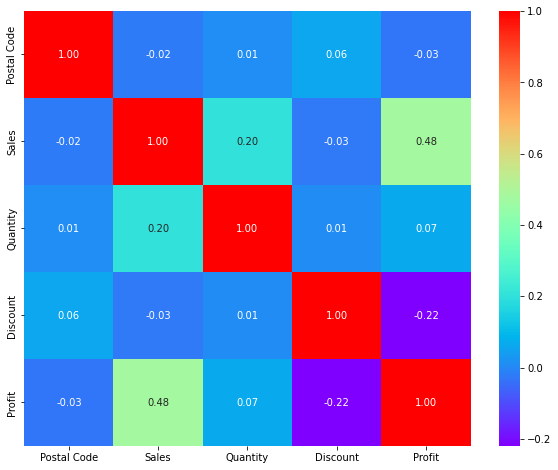

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

In [8]:
correlations = data.corr()
correlations["Profit"].sort_values(ascending=False)

Profit         1.000000
Sales          0.479064
Quantity       0.066253
Postal Code   -0.029961
Discount      -0.219487
Name: Profit, dtype: float64

#### Discount have negative impact on profitability of business. 
#### Sales and Quantity of goods ordered help in increasing the profit.

### Exploring and Analyzing dataset

#### Columns in the dataset

In [9]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### EDA of categorical variables

#### 'Segments'

In [10]:
data.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


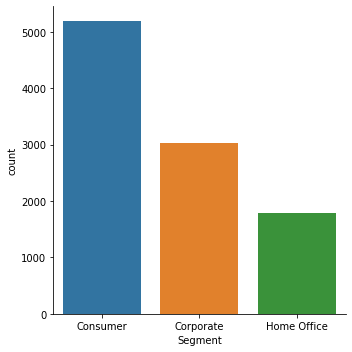

In [11]:
sns.catplot('Segment', data=data, kind='count')

#### Among the three segments of goods, one for consumer purposes are ordered mostly followed by corporate purposes

### 'Regions'

In [12]:
data.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


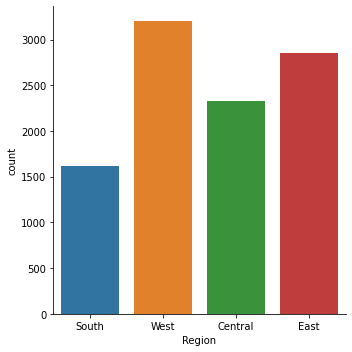

In [13]:
sns.catplot('Region', data=data, kind='count')

#### The Region has been categorized into 4 segments viz. West, East, Central and South. Most of goods are ordered from West region followed by East and Central.

### Number of items under 'Sub-category'

In [14]:
data["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


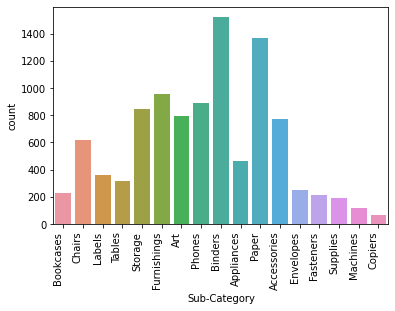

In [15]:
chart=sns.countplot('Sub-Category', data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

None 



#### Binders are most in demand followed by paper and accessories.

### Grouping 'Regions' according to profit

<AxesSubplot:xlabel='Region'>

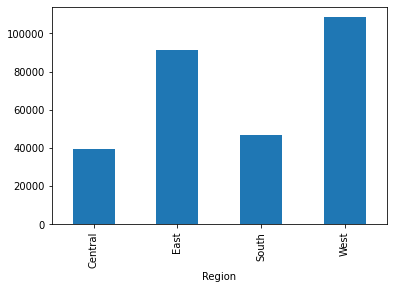

In [16]:
data.groupby("Region").Profit.sum().plot(kind="bar")

In [17]:
data.groupby("Region").Profit.sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

#### We can see that business is generating its most of the profit from "West" region followed by "East'

### Grouping the 'Category' according to profit

In [18]:
data.groupby("Category").Profit.sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

### Overall profit across different categories

<AxesSubplot:ylabel='Profit'>

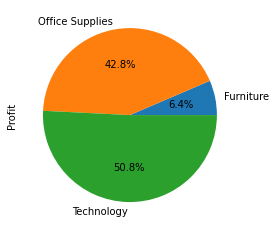

In [19]:
data.groupby("Category").Profit.sum().plot(kind="pie",autopct="%2.1f%%")

#### Most of the profit is coming from "Technology" category followed by "Office Supplies".  

### Grouping the 'Sub-Category' according to profit

<AxesSubplot:xlabel='Sub-Category'>

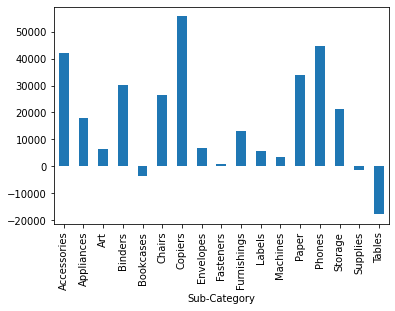

In [20]:
data.groupby("Sub-Category").Profit.sum().plot(kind="bar")


#### Sales of 'Tables' and 'Bookcases' are leading to loss in business.

### Grouping regionwise Profit of items in Sub-category   

In [21]:
data_central=data[data.Region=="Central"]
data_east=data[data.Region=="East"]
data_west=data[data.Region=="West"]
data_south=data[data.Region=="South"]

<AxesSubplot:title={'center':'Central'}, xlabel='Sub-Category'>

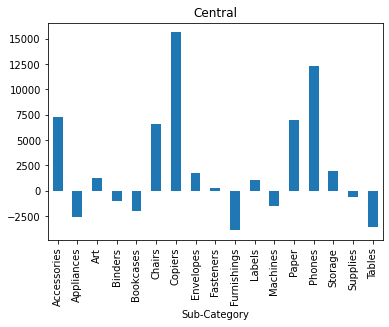

In [22]:
data_central.groupby("Sub-Category").Profit.sum().plot(title="Central",kind="bar")


#### In Central region, sales of "Copiers" and "Phones" result in high profit while "Applicances", "Furnishings" and, "Tables" are making loss. 

<AxesSubplot:title={'center':'East'}, xlabel='Sub-Category'>

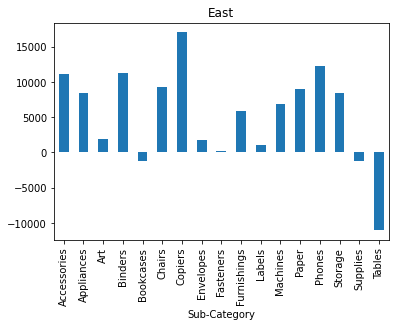

In [23]:
data_east.groupby("Sub-Category").Profit.sum().plot(title="East",kind="bar")

#### In 'East' region,  "Copiers", "Accessories", "Binders" and "Phones" are making high profit while "Tables" is making huge loss. 

<AxesSubplot:title={'center':'West'}, xlabel='Sub-Category'>

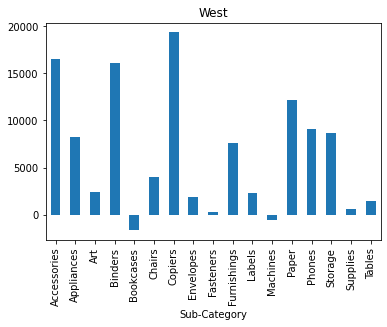

In [24]:
data_west.groupby("Sub-Category").Profit.sum().plot(title="West", kind="bar")

#### In West region, "Accessories", "Binder", "Copiers" and, "Phones" are making most of the high profit while sales of "Bookcases" results in loss. 

<AxesSubplot:title={'center':'South'}, xlabel='Sub-Category'>

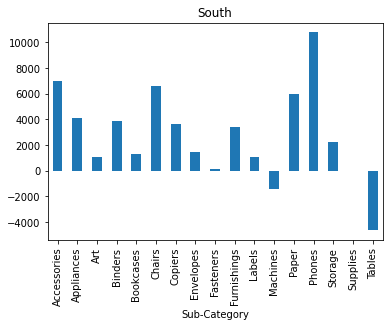

In [25]:
data_south.groupby("Sub-Category").Profit.sum().plot(title="South",kind="bar")

#### In South region "Phones" are making high profit while "Tables" are making loss. 

#### Thus, we can see that sales of "Tables" result in loss in all regions except in "West" region.

### Profits and Discounts across States

Text(0.5, 1.0, 'Discount')

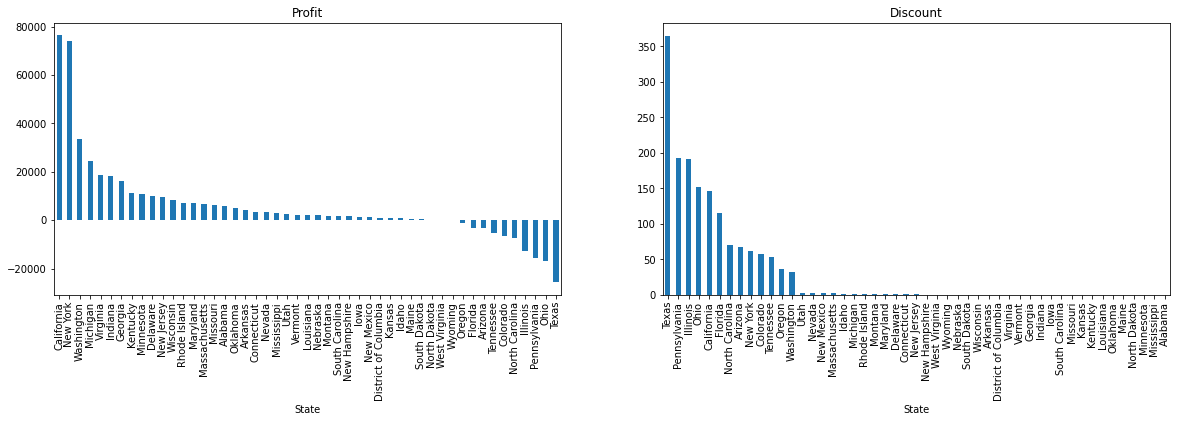

In [26]:
plt.figure(figsize=(20,5))

# Checking for profit
plt.subplot(1,2,1)
data.groupby("State").Profit.sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Profit")

# Checking for Discount
plt.subplot(1,2,2)
data.groupby("State").Discount.sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Discount")

#### * Due to huge discounts given in items in states of Texas, Pennsylvania and Ohio, business is incurring loss.

#### * While items sold across California, Michigan and New York giving less dicounts turn out to be profitable.


### Sales across States

Text(0.5, 1.0, 'Sales')

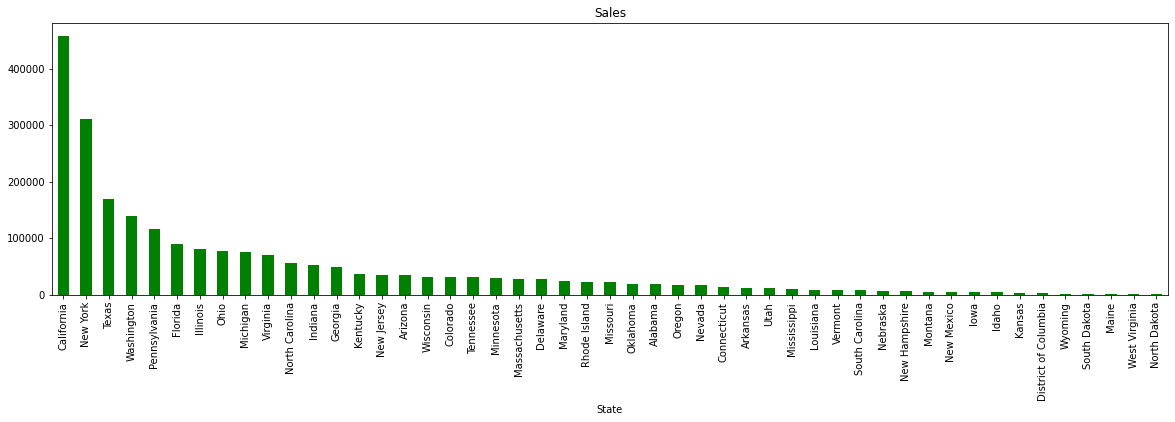

In [27]:
## Checking for sales
plt.figure(figsize=(20,5))

data.groupby("State").Sales.sum().sort_values(ascending=False).plot(kind="bar", color='green')
plt.title("Sales")

#### Sales is high in California, New York, Texas etc

### Items showing heavy loss

In [28]:
data_loss =data[data.Profit<0]
data_loss.shape

(1871, 13)

<AxesSubplot:xlabel='Sub-Category'>

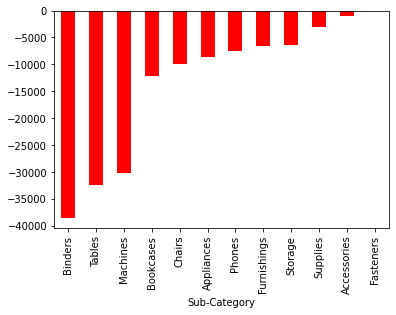

In [29]:
data_loss.groupby("Sub-Category").Profit.sum().sort_values().plot(kind="bar", color='red')

#### -- Most loss is in selling of "Binders", "Tables", "Machines", "Bookcases"

### Sales of Binders

<AxesSubplot:title={'center':'Binders'}, xlabel='State'>

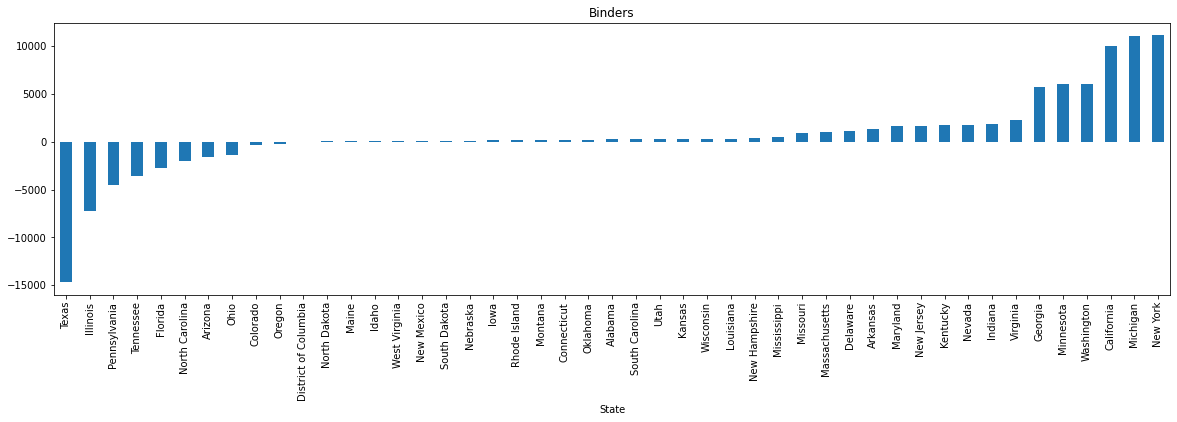

In [30]:
data_Binders = data[data["Sub-Category"]=="Binders"]
plt.figure(figsize=(20,5))
data_Binders.groupby("State").Profit.sum().sort_values().plot(title="Binders", kind="bar")

#### -- By selling "Binders" business makes loss in Texas, IlIinois and Pennisylvania.

#### -- While business is making profit in New York, Michigan, California etc

### Sales of Tables

<AxesSubplot:title={'center':'Tables'}, xlabel='State'>

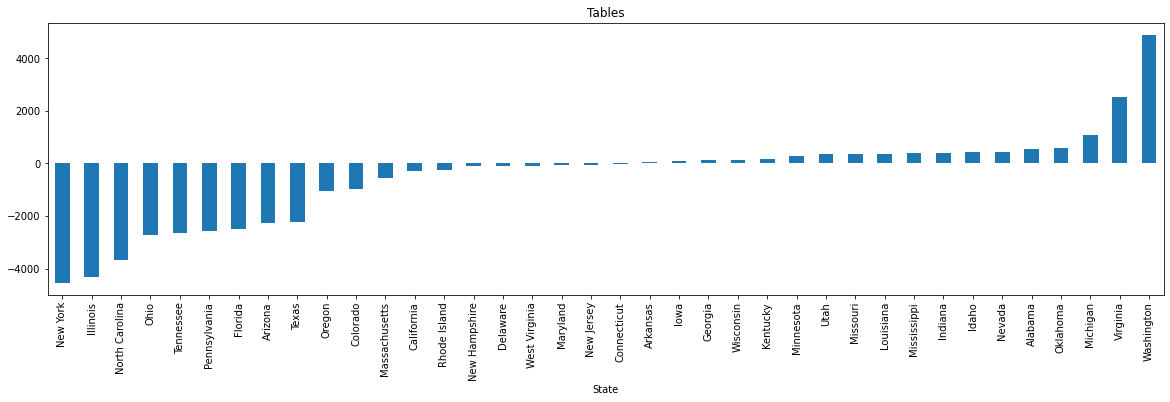

In [31]:
data_tables = data[data["Sub-Category"]=="Tables"]
plt.figure(figsize=(20,5))
data_tables.groupby("State").Profit.sum().sort_values().plot(title="Tables",kind="bar")

#### -- New York, Illinois and North Carolina are not doing good by selling "Tables"

#### -- While Washington and Virginia are doing very good business in this sub-category.


### Sales of Machines

<AxesSubplot:title={'center':'Machines'}, xlabel='State'>

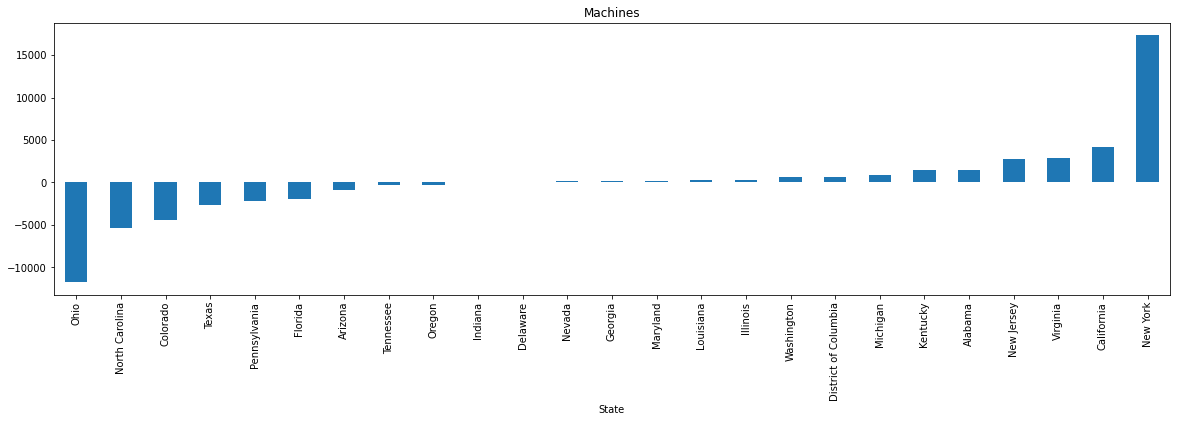

In [32]:
data_Machine = data[data["Sub-Category"]=="Machines"]
plt.figure(figsize=(20,5))
data_Machine.groupby("State").Profit.sum().sort_values().plot(title="Machines",kind="bar")

#### -- In Ohio, North Carolina, business is facing loss by selling "Machines". 
#### -- While business is making profit in New York and California.

### Sales of Bookcases

<AxesSubplot:title={'center':'Bookcases'}, xlabel='State'>

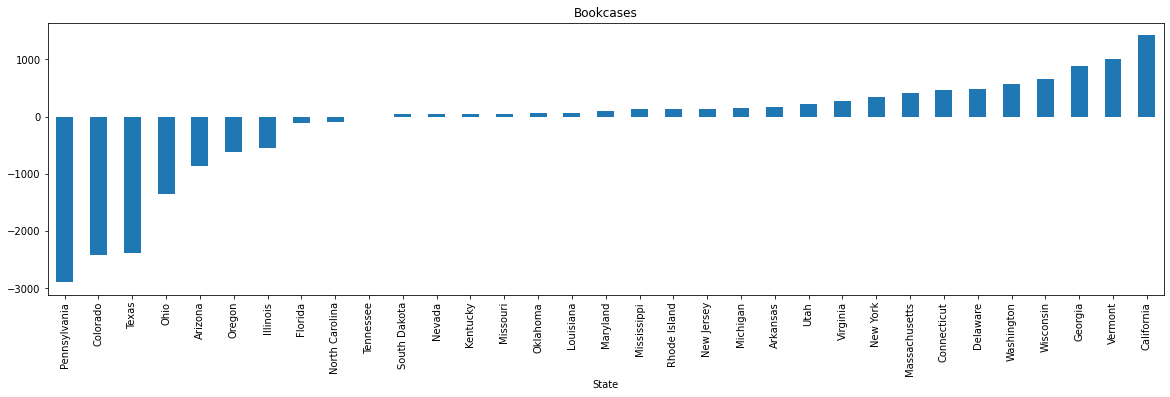

In [33]:
data_book = data[data["Sub-Category"]=="Bookcases"]
plt.figure(figsize=(20,5))
data_book.groupby("State").Profit.sum().sort_values().plot(title="Bookcases",kind="bar")

#### Business is facing most loss in Pennyslavania, Colorado and Texas by selling "Bookcases"

####  Profit in California is high.

### Various discounts given on different Sub-category items

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

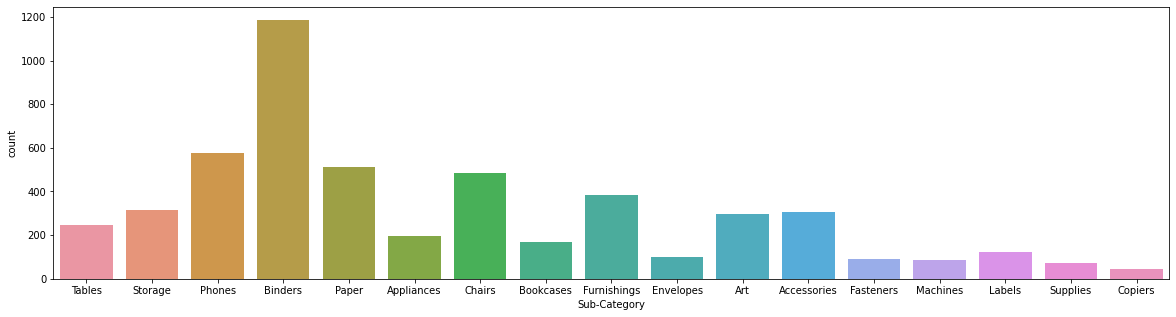

In [34]:
data_discount=data[data.Discount>0]
plt.figure(figsize=(20,5))
sns.countplot(data_discount["Sub-Category"])

#### -- Huge discount is given in "Binders".

### Total Profit across each state giving discounts

<AxesSubplot:xlabel='State'>

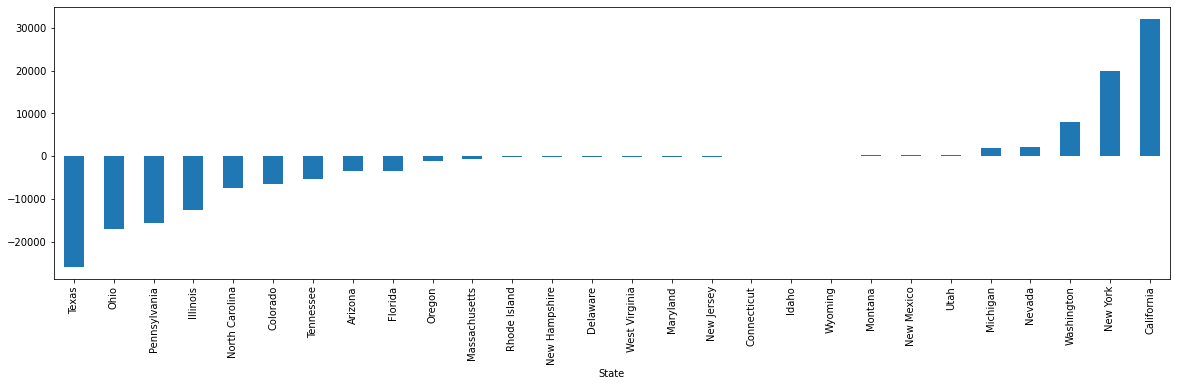

In [35]:
plt.figure(figsize=(20,5))
data_discount.groupby("State").Profit.sum().sort_values().plot(kind="bar")

###  Business Insights 

* Business is not running good in central and south regions. New business strategies must be adopted through promos, ads etc in these regions. 
* The products like Binders, Papers and Phones are given more discounts. As huge discounts in some items are resulting in high losses, discounts must be given judiciously.
* Efforts must be made in states of Texas, Ohio where business is suffering more loss inspite of giving high discounts. 
* States such as California, New York which give more profit be given priorty in business.
* The price of products Binders, Tables, Machines and Bookcases where they going in loss must be set properly in order to curtail loss.
* Market survey must be conducted to study the root cause of loss in the business and efforts must be made to remove drawbacks/pitfalls in the business.
* Services must be improved. 



### Thank You